In [20]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.integrate as sp
from scipy.interpolate import interp1d
# import numdifftools as nd
# from findiff import FinDiff
from matplotlib.patches import Rectangle


In [2]:
dates, times, flow = np.loadtxt('data/water.csv', unpack = True, usecols = (2, 3, 5), dtype=object)
flow = np.array(flow, dtype=float)
t = np.zeros(dates.size)
for i in range(dates.size):
    d = datetime.strptime(dates[i]+times[i], '%Y-%m-%d%H:%M')
    t[i] = d.timestamp()
start_time = t[0]
t -= start_time

In [21]:
def ys(val, xs=t, ys=flow):
    if len(val) == 1:
        idx = (np.abs(xs - val)).argmin()
        return ys[idx]
    else:
        ids = np.zeros(len(val), dtype=int)
        for i in range(len(val)):
            ids[i] = np.argmin(np.abs(xs - val[i])).astype(int)
        return ys[ids]

## Visualizing the data

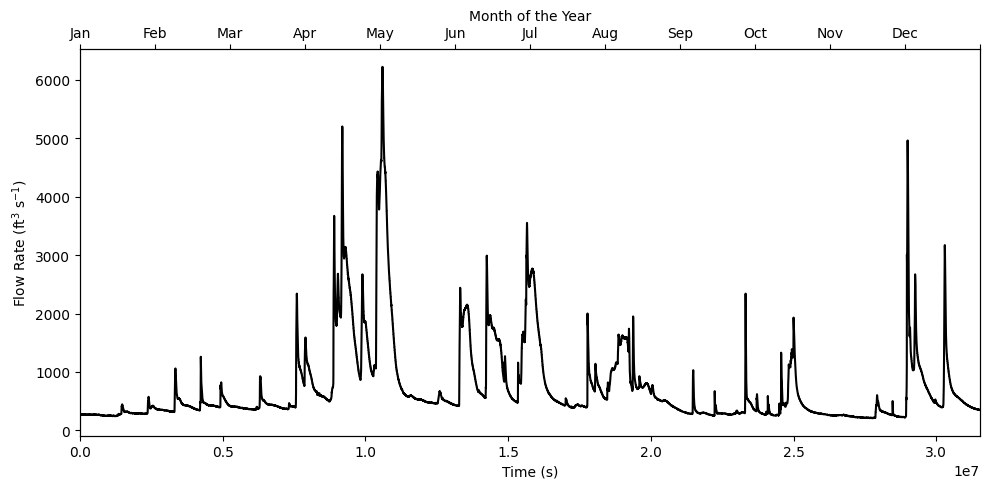

In [34]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(t, flow, 'k')
# tdash = np.linspace(t[0], t[-1], 1000)
# ax.plot(tdash, f(tdash), 'r')
# ax.plot(t[1:], np.diff(flow), 'k')
# ax.plot(t[1:], np.diff(t), 'xk')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
# ax.set_ylim(0, 6400)
ax.set_xlim(0, t[-1])

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.linspace(0, t[-1], 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
ax2.set_xlabel('Month of the Year')
plt.tight_layout()
plt.savefig('plots/2/dams.png', dpi=200)

## Theory
$$
f(t)\\W(T)
$$

$$
f(t) = \frac{dW}{dt}
$$

$$
\implies W(T) = \int_0^T f(t)dt
$$

In [ ]:
def d4dt(y,h=1):
    # diffs = (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/h**4
    diffs = np.zeros(len(y))
    for x in range(2, len(y)-2):
        diffs[x] = (y[x+2]-4*y[x+1]+6*y[x]-4*y[x-1]+y[x-2])/h**4
        # diffs[x] = (y[x+1]-y[x-1])/(2*h)
    return diffs#np.average(diffs)

Let us first work with a small snippet of the data which contains a sharp peak.

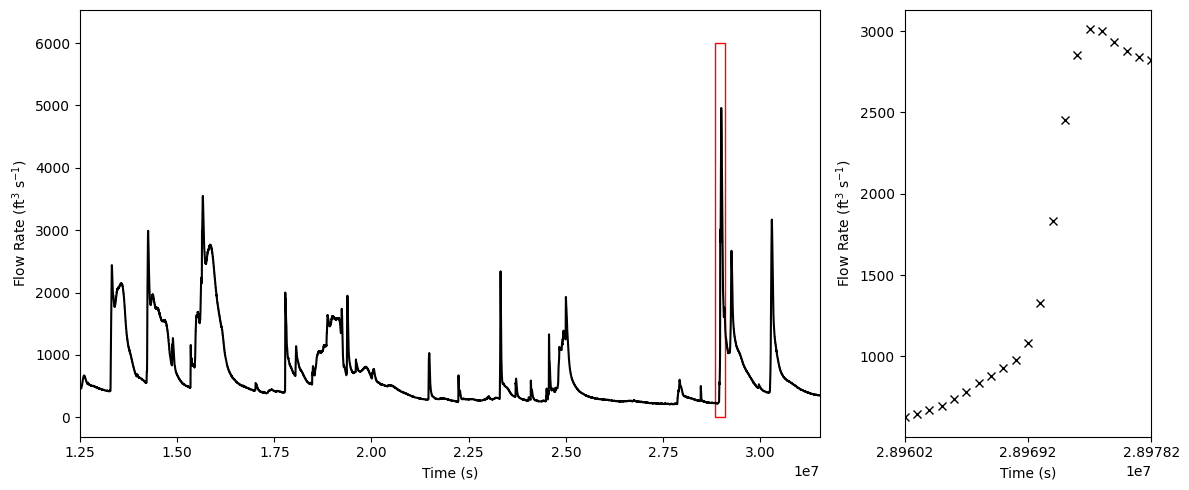

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (12,5), gridspec_kw={'width_ratios': [3, 1]})

ax[0].plot(t, flow, 'k')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
ax[0].set_xlim(1.25e7, t[-1])
a, b = 2.885e7, 2.91e7
rect = Rectangle((a, 0), (b-a), 6000, linewidth=1, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

roi = np.where((t>2.896e7) & (t<2.898e7))
f1 = flow[roi][:-1]
t1 = t[roi][:-1]
ax[1].plot(t1, f1, 'kx', alpha=1)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
ax[1].set_xlim(t1[0], t1[-1])
ax[1].set_xticks(np.linspace(t1[0], t1[-1], 3))
plt.tight_layout()
plt.savefig('plots/2/zoom.png', dpi=200)

In [124]:
# # roi = np.where((t>2.896e7) & (t<2.898e7))
# # f1 = flow[roi][:-1]
# # t1 = t[roi][:-1]
# plt.plot(t1, f1, 'kx', alpha=1)
# plt.xlabel('Time (s)')
# plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
# # plt.xlim(t1[0], t1[-1])
# # plt.ylim(0, 3200)
# plt.savefig('plots/3/snippet.png', dpi=200)

# roi = np.where((t>2.896e7) & (t<2.8983e7))
roi = np.where((t>2.8965e7) & (t<2.898e7))
f1 = flow[roi][:-1]
t1 = t[roi][:-1]

# changing the range of x from 0 to 1 for simplicity
t1 = (t1-np.min(t1))
t1 = t1/np.max(t1)

h = t1[1]-t1[0]
vmin = np.min(f1)
k = 1
half_step = (k*h)/2

n = len(t1)
dx = t1[1]-t[0]
t1.shape

(15,)

## Integration Techniques

### Mid-point rule

(4116.571428571428, 0.05314625850340136)

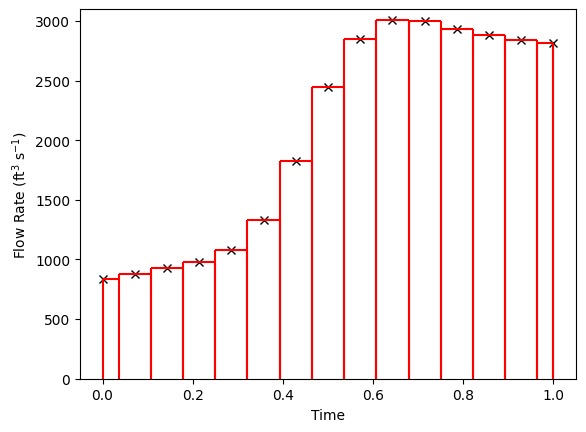

In [ ]:
plt.plot(t1, f1, 'kx', alpha=1)

def mid_point_integration(t1, f1):
    half_step = t1[1]-t1[0]
    mid_point = 0
    mid_point += f1[0]*half_step
    for i in range(1,len(t1)):
        mid_point += f1[i]*half_step*2
    mid_point += f1[-1]*half_step

    f2epsilon = np.max(abs(d2dt(f1)))
    max_error_mid_point = ((t1[-1]-t1[0]) * f2epsilon * dx**2)/(24)
    return mid_point, max_error_mid_point

plt.vlines(t1[0], ymax=f1[0], ymin=0, color='r')
plt.hlines(f1[0], xmin=t1[0], xmax=t1[0]+half_step, color='r')
for i in range(1,len(t1)-1,k):
    plt.vlines(t1[i]-half_step, ymax=f1[i], ymin=0, color='r')
    plt.vlines(t1[i]+half_step, ymax=f1[i], ymin=0, color='r')
    plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')
    # plt.fill_betweenx(f1, t1[i]-half_step, t1[i]+half_step, alpha = 0.25, color='b')
# plt.fill_between(t1, f1, 0, alpha = 0.25, color='b')
plt.vlines(t1[-1]-half_step, ymax=f1[-1], ymin=0, color='r')

plt.vlines(t1[-1], ymax=f1[-1]-half_step, ymin=0, color='r')
plt.vlines(t1[-1], ymax=f1[-1], ymin=0, color='r')
plt.hlines(f1[-1], xmin=t1[-1], xmax=t1[-1]-half_step, color='r')
plt.xlabel('Time')
plt.ylim(0,3100)
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.savefig('plots/2/mid-point.png', dpi=200)

def d2dt(y,h=1):
    diffs = np.zeros(len(y))
    for x in range(2, len(y)-2):
        diffs[x] = (y[x+1]+y[x-1]-2*y[x])/(h**2)
    return diffs

mid_point, max_error_mid_point = mid_point_integration(t1, f1)
mid_point, max_error_mid_point

### Trapezoidal Rule

(2058.285714285714, 0.10629251700680271)

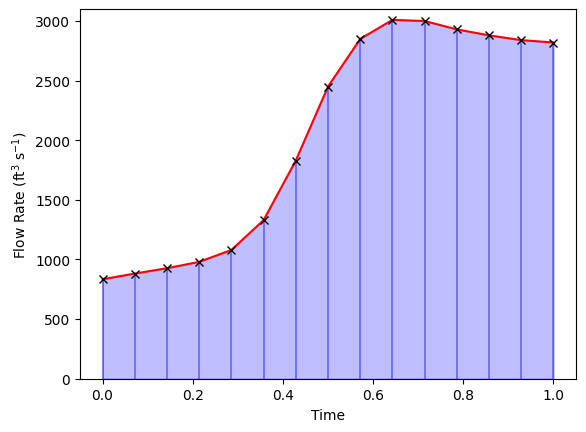

In [163]:
def trapezoidal_integration(t1, f1):
    trapezoidal = (dx/2) * (f1[0] + 2*np.sum(f1[1:-1]) + f1[-1])
    f2epsilon = np.max(abs(d2dt(f1)))
    max_error_trapz = ((t1[-1]-t[0]) * f2epsilon * dx**2)/(12)
    return trapezoidal, max_error_trapz

plt.vlines(t1[0], ymax=f1[0], ymin=0, color='b', alpha=0.4)
# plt.hlines(f1[0], xmin=t1[0], xmax=t1[0]+half_step, color='r')
plt.fill_between(t1, f1, 0, alpha = 0.25, color='b')
for i in range(1,len(t1)-1):
    # plt.vlines(t1[i], ymax=f1[i], ymin=0, color='b', alpha=0.4)
    # plt.plot(t1[i:i+2], f1[i:i+2], '-r')
    plt.vlines(t1[i], ymax=f1[i], ymin=0, color='b', alpha=0.4)
    # plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')
plt.vlines(t1[-1], ymax=f1[-1], ymin=0, color='b', alpha=0.4)
plt.plot(t1, f1, '-r', alpha=1)
plt.plot(t1, f1, 'kx', alpha=1)
plt.xlabel('Time')
plt.ylim(0,3100)
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.savefig('plots/2/trapezoidal.png', dpi=200)

trapezoidal, max_error_trapz = trapezoidal_integration(t1, f1)
trapezoidal, max_error_trapz

### Simpsons 1/3 Rule

(2058.9523809523807, 4.6277014207043356e-05)

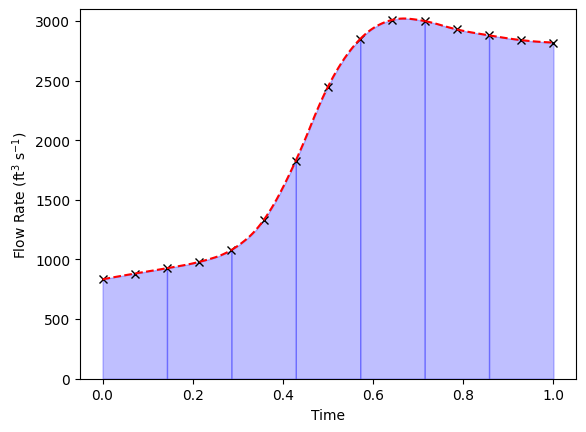

In [165]:
def simpsons_13_integration(t1, f1):
    simpsons_13 = (dx/3) * (f1[0] + 4*np.sum(f1[1:n:2]) + 2*np.sum(f1[2:n-1:2]) + f1[-1])
    f4epsilon = np.max(abs(d4dt(f1)))
    max_error_simpsons_13 = ((t1[-1]-t[0]) * f4epsilon * (dx**4))/(180)
    return simpsons_13, max_error_simpsons_13

""" plotting quadratic interpolation"""
plt.plot(t1, f1, 'kx', alpha=1)
cubic = interp1d(t1, f1, kind='quadratic')
for j in range(0, len(t1)-2, 2):
    xquad = np.linspace(t1[j], t1[j+2], 25)
    plt.plot(xquad, cubic(xquad), '--r')
    plt.fill_between(xquad, cubic(xquad), alpha = 0.25, color='b')

plt.xlabel('Time')
plt.ylim(0,3100)
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.savefig('plots/2/simpsons13.png', dpi=200)

simpsons_13, max_error_simpsons_13 = simpsons_13_integration(t1, f1)
simpsons_13, max_error_simpsons_13

### Simpson's 3/8 Rule

(2033.5982142857142, 0.00010412328196584754)

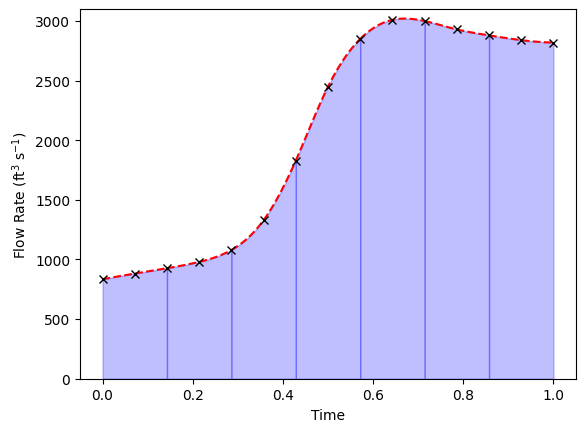

In [173]:
def simpsons_38_integration(t1, f1):
    simpsons_38 = (3*dx/8) * (f1[0] + 3*(np.sum(f1[1:-1:3])+np.sum(f1[2:-1:3])) + 2*np.sum(f1[3:-1:3])+ f1[-1])
    f4epsilon = np.max(abs(d4dt(f1)))
    max_error_simpsons38 = ((t1[-1]-t[0]) * f4epsilon * (dx**4))/(80)
    return simpsons_38, max_error_simpsons38

""" plotting quadratic interpolation"""
cubic = interp1d(t1, f1, kind='cubic')
for j in range(0, len(t1)-2, 2):
    xquad = np.linspace(t1[j], t1[j+2], 25)
    plt.plot(xquad, cubic(xquad), '--r')
    plt.fill_between(xquad, cubic(xquad), alpha = 0.25, color='b')

plt.plot(t1, f1, 'kx', alpha=1)
plt.xlabel('Time')
plt.ylim(0,3100)
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.savefig('plots/2/simpsons38.png', dpi=200)

simpsons_38, max_error_simpsons_38 = simpsons_38_integration(t1, f1)
simpsons_38, max_error_simpsons_38

### booles

In [155]:
boole = (2*dx/45) * (7*f1[0] + 32*np.sum(f1[1:-1:2]) + 12*np.sum(f1[2:-2:4]) + 14*np.sum(f1[4:-4:4])+ 7*f1[-1])
def d6dt(y,h=1):
    diffs = np.zeros(len(y))
    for x in range(3, len(y)-3):
        diffs[x] = (y[x-3]-6*y[x-2]+15*y[x-1]-20*y[x]+15*y[x+1]-6*y[x+2]+y[x+3])/(h**6)
    return diffs
f6epsilon = np.max(abs(d6dt(f1)))
max_error_boole = (2* (t1[-1]-t1[0]) * f6epsilon * (dx**6))/945
boole, max_error_boole

(1940.2730158730158, 2.136208138809095e-07)

all together plot

Text(0, 0.5, 'Flow Rate (ft$^3$ s$^{-1}$)')

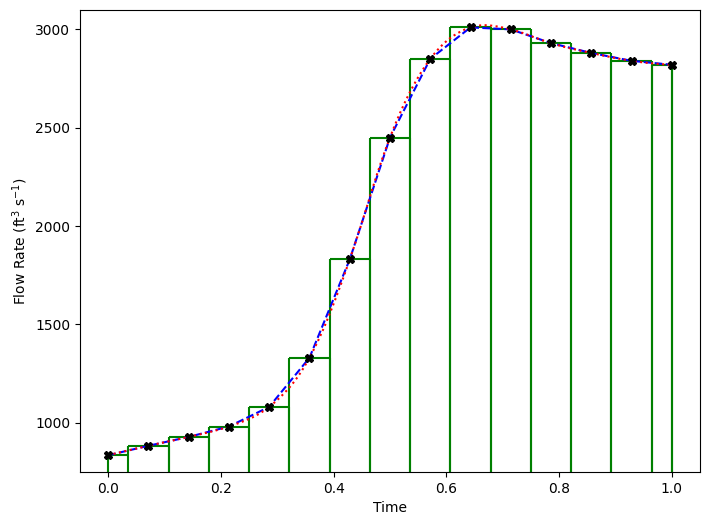

In [151]:
plt.figure(figsize=(8,6))
# mid - point
cl = 'g'
plt.vlines(t1[0], ymax=f1[0], ymin=0, color=cl)
plt.hlines(f1[0], xmin=t1[0], xmax=t1[0]+half_step, color=cl)
for i in range(1,len(t1)-1,k):
    plt.vlines(t1[i]-half_step, ymax=f1[i], ymin=0, color=cl)
    plt.vlines(t1[i]+half_step, ymax=f1[i], ymin=0, color=cl)
    plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color=cl)
plt.vlines(t1[-1]-half_step, ymax=f1[-1], ymin=0, color=cl)
plt.vlines(t1[-1], ymax=f1[-1]-half_step, ymin=0, color=cl)
plt.vlines(t1[-1], ymax=f1[-1], ymin=0, color=cl)
plt.hlines(f1[-1], xmin=t1[-1], xmax=t1[-1]-half_step, color=cl)

# trapz
plt.plot(t1, f1, '--b', alpha=1)

# simpsons
cubic = interp1d(t1, f1, kind='quadratic')
for j in range(0, len(t1)-2, 2):
    xquad = np.linspace(t1[j], t1[j+2], 25)
    plt.plot(xquad, cubic(xquad), ':r')

# cubic = interp1d(t1, f1, kind='cubic')
# for j in range(0, len(t1)-2, 2):
#     xquad = np.linspace(t1[j], t1[j+2], 25)
#     plt.plot(xquad, cubic(xquad), ':b')

plt.plot(t1, f1, 'kX', alpha=1)

plt.xlabel('Time')
plt.ylim(750,3100)
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
# plt.savefig('plots/2/mid-point.png', dpi=200)


## Results

For the smaller region of interest

In [174]:
print(f'Mid-point: {mid_point} ± {max_error_trapz}')
print(f'Trapezoidal: {trapezoidal} ± {max_error_trapz}')
print(f'Simpsons 1/3: {simpsons_13} ± {max_error_simpsons_13}')
print(f'Simpsons 3/8: {simpsons_38} ± {max_error_simpsons_38}')
sp.simpson(f1, t1, dx = dx), len(t1), sp.cumulative_trapezoid(f1, t1, dx=dx, initial=0)[-1]

Mid-point: 4116.571428571428 ± 0.10629251700680271
Trapezoidal: 2058.285714285714 ± 0.10629251700680271
Simpsons 1/3: 2058.9523809523807 ± 4.6277014207043356e-05
Simpsons 3/8: 2033.5982142857142 ± 0.00010412328196584754


(2058.952380952381, 15, 2058.285714285714)

For the entire domain

In [195]:
tmax = t[-1]
int_t = t/np.max(t)

mid_point, max_error_mid_point = mid_point_integration(int_t, flow)
trapezoidal, max_error_trapz = trapezoidal_integration(int_t, flow)
simpsons_13, max_error_simpsons13 = simpsons_13_integration(int_t, flow)
simpsons_38, max_error_simpsons38 = simpsons_38_integration(int_t, flow)
# mid_point, max_error_mid_point = mid_point_integration(t, flow)

print(f'Mid-point: ({mid_point*tmax*1e-9} ± {max_error_mid_point*tmax*1e-9}) x 10^9 ft^3')
print(f'Trapezoidal: ({trapezoidal*tmax*1e-9} ± {max_error_trapz*tmax*1e-9}) x 10^9 ft^3')
print(f'Simpsons 1/3: ({simpsons_13*tmax*1e-9} ± {max_error_simpsons13*tmax*1e-9}) x 10^9 ft^3')
print(f'Simpsons 3/8: ({simpsons_38*tmax*1e-9} ± {max_error_simpsons38*tmax*1e-9}) x 10^9 ft^3')
# print(f'Simpsons 3/8: {boole*tmax*1e-9} x 10^9 ± {max_error_boole*tmax} ft^3')

sp.simpson(flow, t, dx=dx)*tmax*1e-18, len(t), sp.cumulative_trapezoid(flow, t, dx=dx, initial=0)[-1]*tmax*1e-9, tmax

Mid-point: (46.41409710000237 ± 0.0016759247448979591) x 10^9 ft^3
Trapezoidal: (58080.61193535 ± 0.0033518494897959183) x 10^9 ft^3
Simpsons 1/3: (8.69968512857143 ± 1.4593086214077466e-06) x 10^9 ft^3
Simpsons 3/8: (58080.49593454286 ± 3.2834443981674297e-06) x 10^9 ft^3


(0.7326476610227326, 34993, 732660677.1579599, 31534200.0)